# Assoc Memory Task Composites and Analysis

#### The goals of this file are
- create a composite score of avg acc and avg rt
- compare this across subjects
- compare this across intervention groups
- compare this across baseline fitness


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/LOGISMOS-BH/data/extend_assocBlockAvgs_long_n127.csv')
list = pd.read_csv('../../data/breathhold_clusters.csv')

In [16]:
# using subID from clusters, get the corresponding rows from the df by column 'Subject'

df = df[df['Subject'].isin(list['subID'])]

#add the cluster columns to the df by subID/Subject
df = df.merge(list, left_on='Subject', right_on='subID')

#drop subID column and all columns that end in _y
df = df.drop(columns=['subID'])
df = df.loc[:, ~df.columns.str.endswith('_x')]
df = df.loc[:, ~df.columns.str.endswith('_y')]

df.head()



,Subject,Block,Gender,avg_acc,sd_acc,avg_rt,sd_rt,cluster,vo2rel,Group
0,2002,1,Female,0.233333,0.430183,1594.714286,294.699120,2,14.4,A
1,2002,2,Female,0.500000,0.508548,1314.666667,354.451824,2,14.4,A
2,2002,3,Female,0.466667,0.507416,1522.500000,303.880986,2,14.4,A
3,2002,4,Female,0.400000,0.498273,1193.583333,332.234708,2,14.4,A
4,2002,5,Female,0.366667,0.490133,1312.363636,341.484779,2,14.4,A


In [17]:
collapsed_data = df.groupby('Subject')[['avg_acc', 'avg_rt']].mean().reset_index()

# Rename columns for clarity
collapsed_data.columns = ['Subject', 'mean_avg_acc', 'mean_avg_rt']

# Display the result
df = collapsed_data
df = df.merge(list, left_on='Subject', right_on='subID')

#drop subID column and all columns that end in _y
df = df.drop(columns=['subID'])
df = df.loc[:, ~df.columns.str.endswith('_x')]
df = df.loc[:, ~df.columns.str.endswith('_y')]

df.head()


,Subject,mean_avg_acc,mean_avg_rt,cluster,vo2rel,Group
0,2002,0.486667,1344.458055,2,14.4,A
1,2020,0.383333,1348.513413,2,15.2,P
2,2041,0.540000,1113.603275,0,17.6,P
3,2042,0.323333,1180.031786,2,13.5,A
4,2053,0.353333,1448.015955,1,25.0,A


Finished preproc, move to analysis

Text(0.5, 1.0, 'Distribution of avg_acc by cluster and by group')

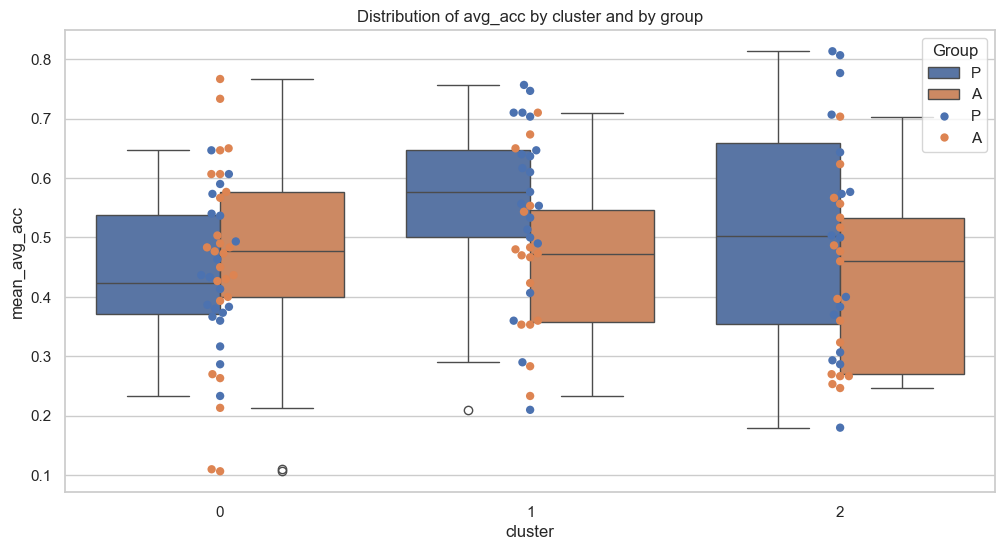

In [18]:
#plot distribution of avg_acc by cluster and by group add sub scatterplot of of avg_acc by cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='mean_avg_acc', data=df, hue='Group')
sns.swarmplot(x='cluster', y='mean_avg_acc', data=df, hue='Group', size=6)
plt.title('Distribution of avg_acc by cluster and by group')



Text(0.5, 1.0, 'Distribution of avg_rt by cluster and by group')

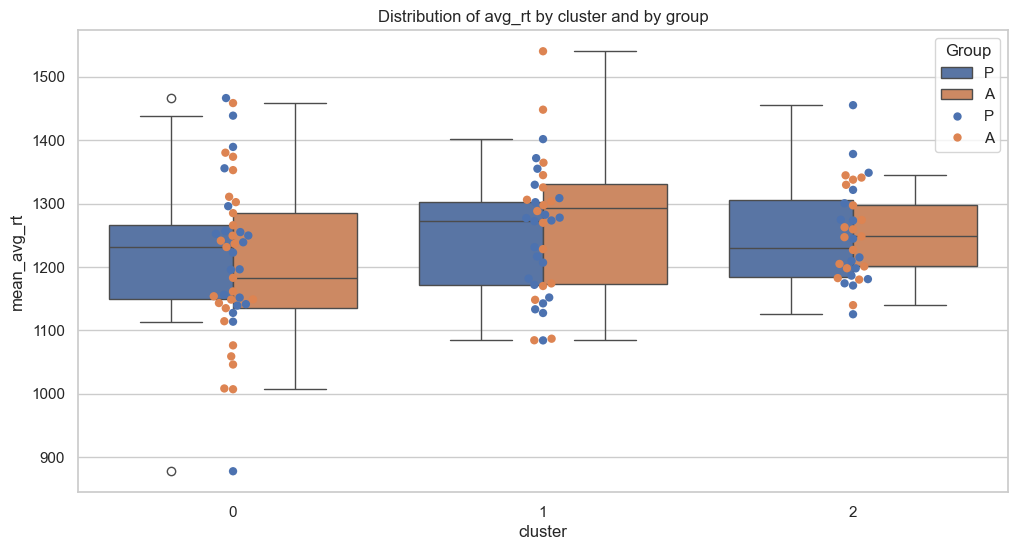

In [19]:
#plot the avg rt by cluster and by group
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='mean_avg_rt', data=df, hue='Group')
sns.swarmplot(x='cluster', y='mean_avg_rt', data=df, hue='Group', size=6)
plt.title('Distribution of avg_rt by cluster and by group')


